In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range (50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) #Experienced side effects

    random_older = randint(63,100)
    train_samples.append(random_older)
    train_labels.append(0) #No side effects

for i in range (1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0) #Side effects

    random_older = randint(63,100)
    train_samples.append(random_older)
    train_labels.append(1) # No side effects



In [7]:
print(train_samples[:5], len(train_samples))
print(train_labels[:5], len(train_labels))

[24, 71, 48, 97, 29] 2100
[1, 0, 1, 0, 1] 2100


In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_train_samples[:5]

array([[0.49425287],
       [0.40229885],
       [0.35632184],
       [1.        ],
       [0.51724138]])

Creating an artificial neural network

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [14]:
model = Sequential([
    Dense(units= 16, input_shape=(1,),activation='relu'),
    Dense(units= 32, activation='relu'),
    Dense(units= 2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Training the model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x = scaled_train_samples, y= train_labels, validation_split= 0.1, batch_size=10, shuffle = True, epochs=30, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.6947 - accuracy: 0.4492 - val_loss: 0.6815 - val_accuracy: 0.5476 - 2s/epoch - 12ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6677 - accuracy: 0.6116 - val_loss: 0.6553 - val_accuracy: 0.6381 - 241ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6426 - accuracy: 0.6519 - val_loss: 0.6326 - val_accuracy: 0.6619 - 235ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6201 - accuracy: 0.6815 - val_loss: 0.6128 - val_accuracy: 0.6952 - 231ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5992 - accuracy: 0.7079 - val_loss: 0.5930 - val_accuracy: 0.7238 - 235ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5779 - accuracy: 0.7323 - val_loss: 0.5729 - val_accuracy: 0.7524 - 235ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5562 - accuracy: 0.7603 - val_loss: 0.5525 - val_accuracy: 0.7905 - 235ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5338 - accuracy: 0.7794 - val_loss: 0.5322 - val_accuracy: 0.8143 - 259ms/epoch - 1ms/step
Ep

Building a test set and predicting

In [18]:
test_labels = []
test_samples = []

for i in range (50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1) #Experienced side effects

    random_older = randint(63,100)
    test_samples.append(random_older)
    test_labels.append(0) #No side effects

for i in range (1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0) #Side effects

    random_older = randint(63,100)
    test_samples.append(random_older)
    test_labels.append(1) # No side effects

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels,test_samples = shuffle(test_labels,test_samples)

scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))

In [19]:
predictions = model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [20]:
print(predictions[:5])

[[0.3654261  0.6345739 ]
 [0.94719017 0.05280977]
 [0.31042993 0.68957007]
 [0.03912713 0.9608728 ]
 [0.9280486  0.07195139]]


In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred= rounded_predictions)

In [28]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation = 45)
    plt.yticks(tick_marks,classes) 

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    tresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > tresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

In [29]:
cm_plot_labels=['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[ 967   83]
 [  44 1006]]


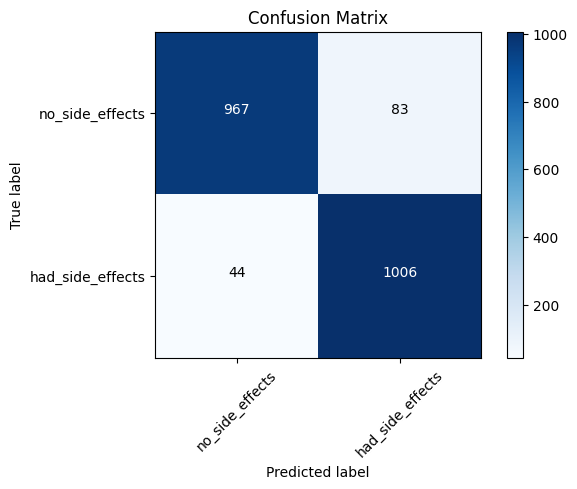

In [30]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')